# Classifying Penguins with Keras

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from palmerpenguins import load_penguins

In [7]:
penguins = load_penguins()
penguins = penguins.sample(frac = 1)
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
224,Gentoo,Biscoe,48.2,15.6,221.0,5100.0,male,2008
38,Adelie,Dream,37.6,19.3,181.0,3300.0,female,2007
308,Chinstrap,Dream,42.5,16.7,187.0,3350.0,female,2008
235,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,male,2009
243,Gentoo,Biscoe,52.2,17.1,228.0,5400.0,male,2009
...,...,...,...,...,...,...,...,...
255,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,male,2009
35,Adelie,Dream,39.2,21.1,196.0,4150.0,male,2007
180,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,female,2007
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female,2007


In [9]:
penguins_x = pd.concat([penguins[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']], pd.get_dummies(penguins['sex'])], axis = 1)
penguins_x = penguins_x[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'male', 'female']]
penguins_x


,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,male,female
224,5100.0,48.2,15.6,221.0,True,False
38,3300.0,37.6,19.3,181.0,False,True
308,3350.0,42.5,16.7,187.0,False,True
235,5350.0,50.0,15.9,224.0,True,False
243,5400.0,52.2,17.1,228.0,True,False
...,...,...,...,...,...,...
255,5500.0,49.1,15.0,228.0,True,False
35,4150.0,39.2,21.1,196.0,True,False
180,4600.0,48.2,14.3,210.0,False,True
157,4550.0,46.5,13.5,210.0,False,True


In [11]:
x = penguins_x.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_penguins_x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=penguins_x.columns)
scaled_penguins_x

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,male,female
0,0.666667,0.585455,0.297619,0.830508,1.0,0.0
1,0.166667,0.200000,0.738095,0.152542,0.0,1.0
2,0.180556,0.378182,0.428571,0.254237,0.0,1.0
3,0.736111,0.650909,0.333333,0.881356,1.0,0.0
4,0.750000,0.730909,0.476190,0.949153,1.0,0.0
...,...,...,...,...,...,...
328,0.777778,0.618182,0.226190,0.949153,1.0,0.0
329,0.402778,0.258182,0.952381,0.406780,1.0,0.0
330,0.527778,0.585455,0.142857,0.644068,0.0,1.0
331,0.513889,0.523636,0.047619,0.644068,0.0,1.0


In [13]:
penguins_y = penguins['species']
print(penguins_y)
penguins_y = penguins_y.astype('category').cat.codes.to_numpy()
penguins_y

224       Gentoo
38        Adelie
308    Chinstrap
235       Gentoo
243       Gentoo
         ...    
255       Gentoo
35        Adelie
180       Gentoo
157       Gentoo
46        Adelie
Name: species, Length: 333, dtype: object


array([2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0,

In [15]:
#construct the model
inputs = keras.Input(shape=(6,))
x = layers.Dense(7, activation = 'relu')(inputs)
x = layers.Dense(5, activation = 'relu')(x)
x = layers.Dense(3, activation = 'relu')(x)
outputs = layers.Dense(3, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model")

In [17]:
model.summary()

Model: "penguin_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │              49 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119 (476.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 0 (0.00 B)

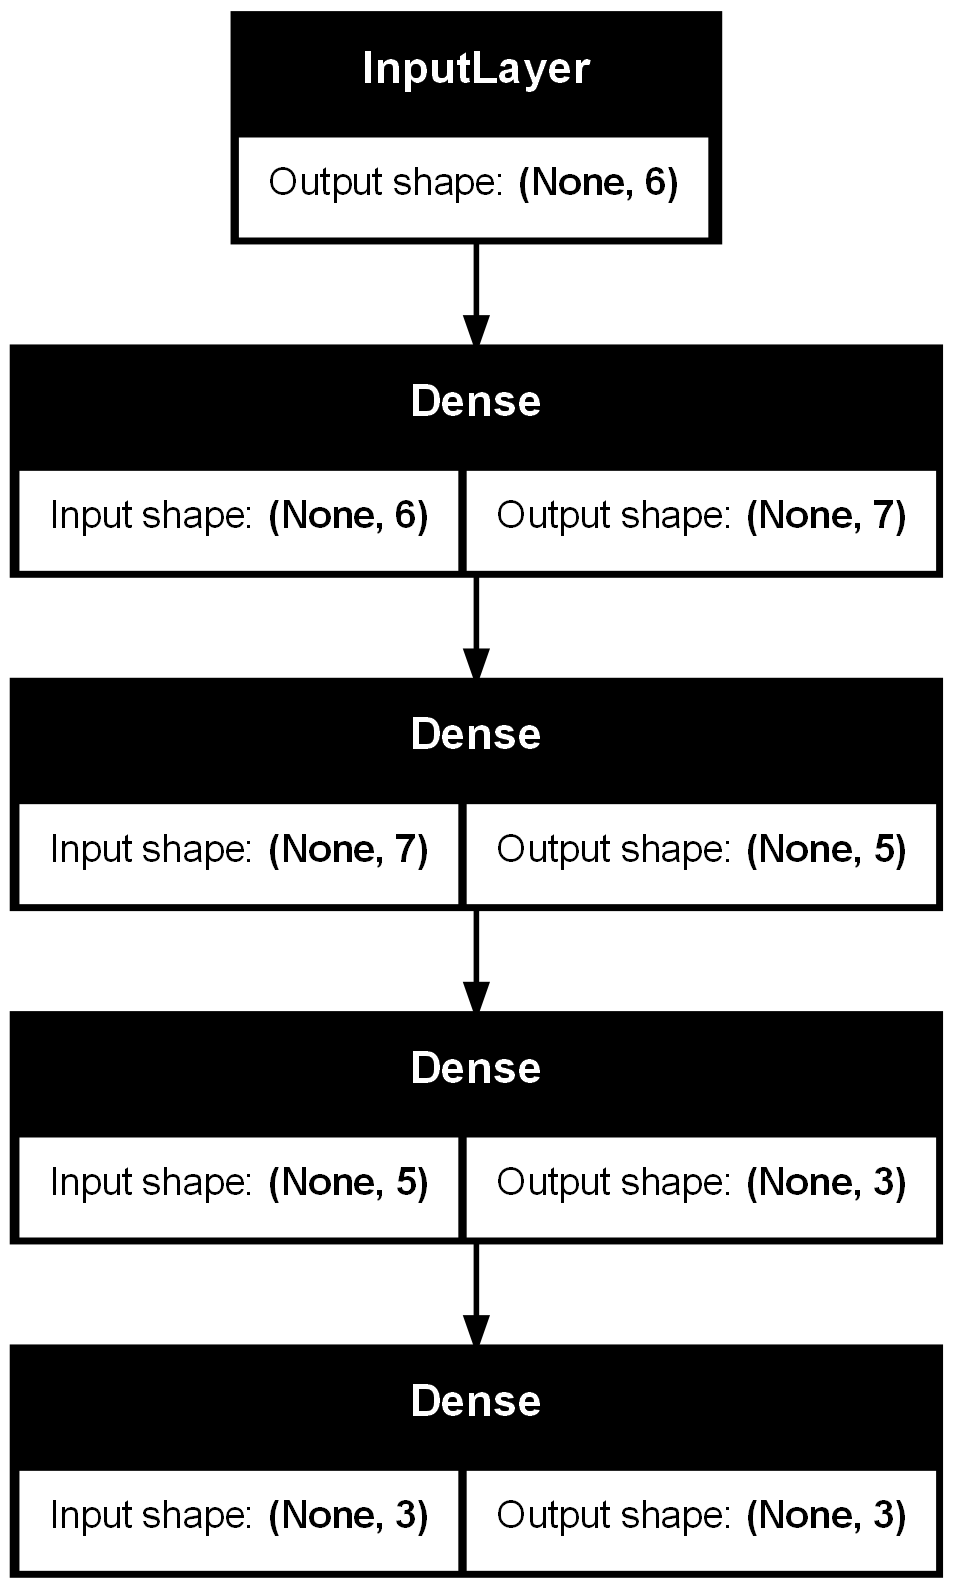

In [19]:
keras.utils.plot_model(model, show_shapes = True)

In [21]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(penguins_x, penguins_y, batch_size = 64, epochs=10, validation_split=0.1)

scores = model.evaluate(penguins_x, penguins_y, verbose=2)

Epoch 1/10


C:\Users\Bnkes\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4072 - loss: 275.0039 - val_accuracy: 0.5294 - val_loss: 206.2287
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4120 - loss: 249.5193 - val_accuracy: 0.5294 - val_loss: 191.2256
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4092 - loss: 243.3908 - val_accuracy: 0.5294 - val_loss: 179.1649
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3947 - loss: 234.6787 - val_accuracy: 0.5294 - val_loss: 168.5539
Epoch 5/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 173.1947

C:\Users\Bnkes\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4498 - loss: 192.0947 - val_accuracy: 0.5294 - val_loss: 158.1806
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4480 - loss: 185.9113 - val_accuracy: 0.5294 - val_loss: 148.6227
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4187 - loss: 183.5473 - val_accuracy: 0.5294 - val_loss: 139.6743
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4483 - loss: 158.0856 - val_accuracy: 0.5294 - val_loss: 130.9902
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4370 - loss: 154.8634 - val_accuracy: 0.5294 - val_loss: 122.6128
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4283 - loss: 150.4827 - val_accuracy: 0.5294 - val_loss: 114.9812
11/11 - 0s - 2ms/step - accuracy: 0.4384 - loss: 136.0075


In [23]:
model_scaled = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model_scaled")

model_scaled.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history_scaled = model_scaled.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 10, validation_split = 0.1)

scores = model_scaled.evaluate(scaled_penguins_x, penguins_y, verbose = 2)

Epoch 1/10


C:\Users\Bnkes\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3783 - loss: 1.1157 - val_accuracy: 0.4118 - val_loss: 1.1051
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3712 - loss: 1.1085 - val_accuracy: 0.4118 - val_loss: 1.0995
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3608 - loss: 1.1041 - val_accuracy: 0.4118 - val_loss: 1.0948
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3749 - loss: 1.0982 - val_accuracy: 0.4412 - val_loss: 1.0901
Epoch 5/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3750 - loss: 1.0975

C:\Users\Bnkes\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4178 - loss: 1.0959 - val_accuracy: 0.5882 - val_loss: 1.0861
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4918 - loss: 1.0902 - val_accuracy: 0.5882 - val_loss: 1.0817
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4870 - loss: 1.0863 - val_accuracy: 0.6176 - val_loss: 1.0769
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4604 - loss: 1.0833 - val_accuracy: 0.6176 - val_loss: 1.0718
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5525 - loss: 1.0787 - val_accuracy: 0.7941 - val_loss: 1.0665
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6123 - loss: 1.0733 - val_accuracy: 0.7941 - val_loss: 1.0613
11/11 - 0s - 2ms/step - accuracy: 0.6276 - loss: 1.0686
